# Image Histograms

Histograms can help us to have a more general comprehension of a certain image. When we plot a histogram, the main objective is to analyze the contrast, brightness and, intensity distribution.

OpenCV offers to us a **cv2.calcHist(images,channels,mask,histSize,ranges)** function.

Arguments

- image:the image you want to analyze
- channels: [0] for gray scale images and [0, 1, 2] for images in RGB space
- mask: if you want to apply any mask 
- histSize: the number of bins (for each channel) we want to use when computing a histogram
- ranges: the range of possible pixel values. Normally, this is [ 0, 256 ] for each channel.
For this example we consider two different images. One with a majoritarian black background, the other with a multi color background.

Images:
- Gilberto Gil, Brazilian singer
- JK bridge in Brasilia

## Importing Libraries

In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

### Loading the image from disk


In [2]:
img1 = cv2.imread("gil.jpg")
img2 = cv2.imread("jk-bridge.jpg")

### Histogram with gray scale

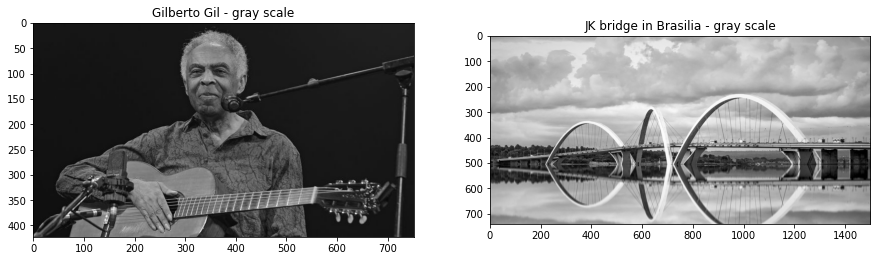

In [3]:
# converting the image into gray scale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
#plotting
fig = plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.title("Gilberto Gil - gray scale")
plt.imshow(cv2.cvtColor(gray1, cv2.COLOR_BGR2RGB))
plt.subplot(2, 2, 2)
plt.title("JK bridge in Brasilia - gray scale")
plt.imshow(cv2.cvtColor(gray2, cv2.COLOR_BGR2RGB))

In [4]:
# Making the histogram with cv2.calcHist
hist1 = cv2.calcHist([gray1], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([gray2], [0], None, [256], [0, 256])

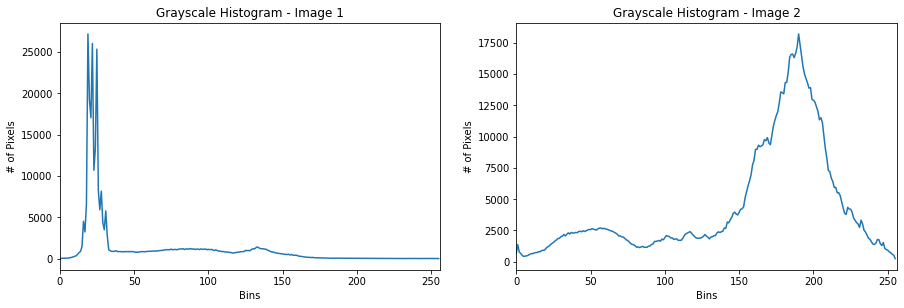

In [5]:
# Plotting the Histograms
#first image
fig = plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Grayscale Histogram - Image 1")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist1)
plt.xlim([0, 256])
#second image
plt.subplot(2,2,2)
plt.title("Grayscale Histogram - Image 2")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist2)
plt.xlim([0, 256])
plt.show()

The histograms show results very interesting, because for the image 1, the black background is the majority of the image. So, as we can see, the most frequents pixels are in the range between 10 and 30, that represents the black background. For the image 2, the scenario is different, we can observe a peak around 200, that means the brightness present in the beautiful sky and, in water reflex. Beyond the peak, we observe that along the range of 0 to 256 there is a frequency of appearance.

### Histogram with color scale, channel by channel

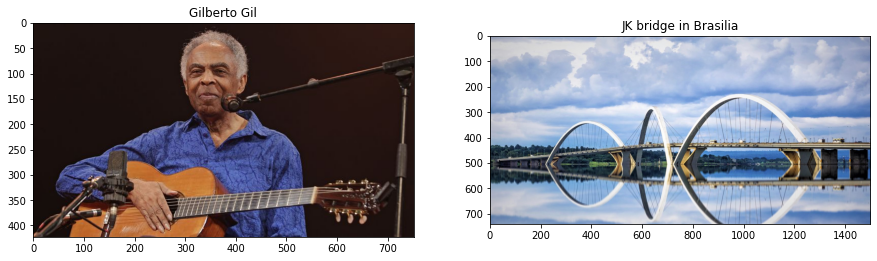

In [6]:
# looking the original images
fig = plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("Gilberto Gil")
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.title("JK bridge in Brasilia")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

To calculate the histogram for each channel, we must split the image into your respectives channels.

In [7]:
chans1 = cv2.split(img1) # to split the channels (these channels will be considered in the image argument)
chans2 = cv2.split(img2) # This returns a list with three channels
colors = ("b", "g", "r") # tuple of channels

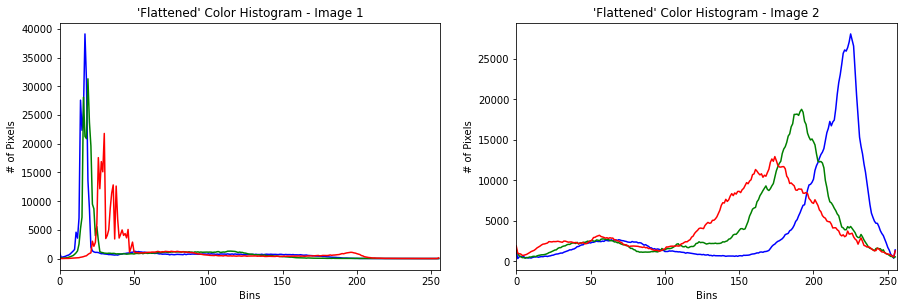

In [8]:
# Plotting the histograms
fig = plt.figure(figsize=(15,10))
#Image 1
plt.subplot(2,2,1)
plt.title("'Flattened' Color Histogram - Image 1")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
for (chan, color) in zip(chans1, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])
# Image 2
plt.subplot(2,2,2)
plt.title("'Flattened' Color Histogram - Image 2")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
for (chan, color) in zip(chans2, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])
plt.show()

Once again, for the image 1, the pixels more frequents in the both channels are in the range of 10 and 30, due to the black background. As the image does not have many colors, the pixels out of the black range are less frequents. On the other hand, for the image 2, we can observer that the blue channel shows a more significant peak around 240, this is reasonable, due to the blue sky and water. For the green channel, the peak is around 190, that means a darker green, we can see in the image some trees.

### 2D histogram

If we want to visualize in 2d dimensions and compare the peaks of intensity among the two channels.

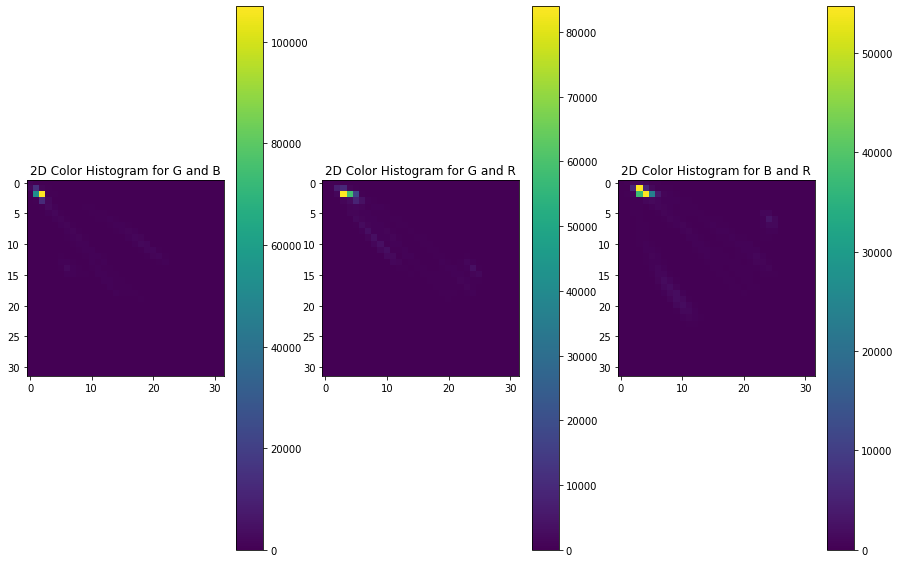

In [9]:
fig = plt.figure(figsize=(15,10))
# Comparing Green and Blue
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans1[1], chans1[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

# Comparing Green and Red
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans1[1], chans1[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

# Comparing Red and Blue
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans1[0], chans1[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)
plt.show()

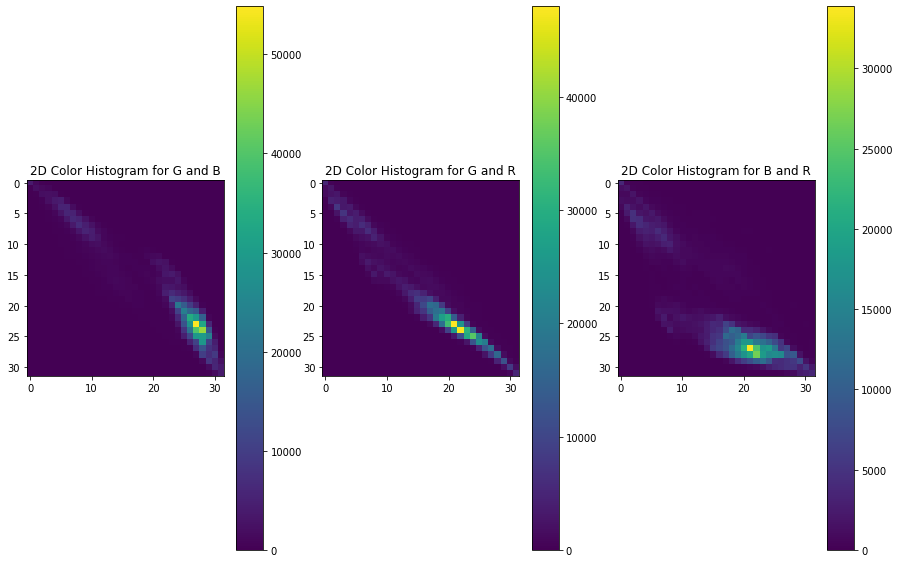

In [10]:
fig = plt.figure(figsize=(15,10))
# Comparing Green and Blue
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans2[1], chans2[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

# Comparing Green and Red
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans2[1], chans2[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

# Comparing Red and Blue
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans2[0], chans2[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)
plt.show()

With the 2D plot, we can compare the pixels distribution among two channels, or more precisely the peaks that each channel contains. For example, for the image 2, the first plot shows the peak for the green channel around 22 in y coordinate and, a peak around 27 in x coordinate for the blue channel. 

**NOTE**: in the function cv2.calcHist we change a little bit the arguments in comparison with the last example. Here, we consider a list of two channels for the image argument, the same for the channel argument. For the bins argument, we consider 32 for each channel, it means that for each beans we have a range of 8 pixels. 

### Histogram Equalization

**from OpenCV website**

Consider an image whose pixel values are confined to some specific range of values only. For eg, brighter image will have all pixels confined to high values. But a good image will have pixels from all regions of the image. So you need to stretch this histogram to either ends (as given in below image, from wikipedia) and that is what Histogram Equalization does (in simple words).

**cv2.equalizeHist(image)**

In [11]:
# Applying the function
eq1 = cv2.equalizeHist(gray1)
eq2 = cv2.equalizeHist(gray2)

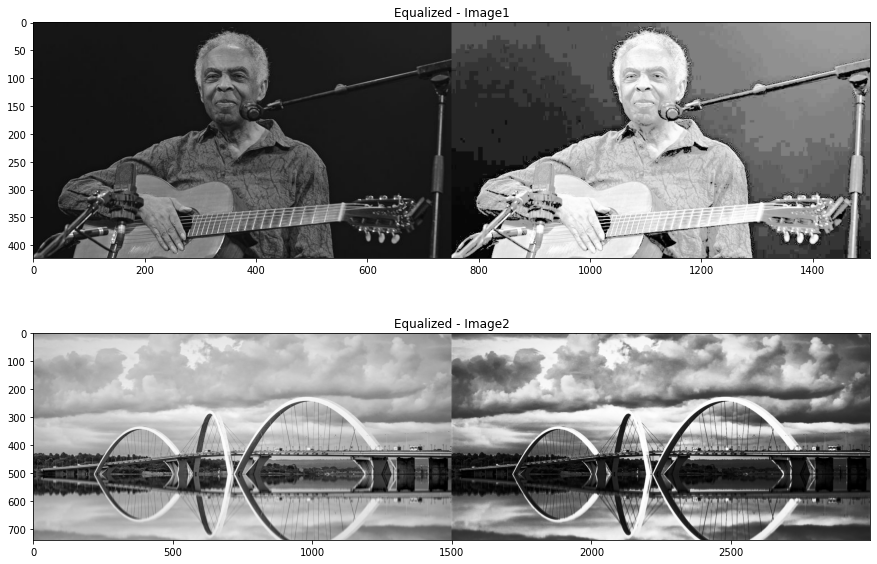

In [12]:
# Comparing the images
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.title("Equalized - Image1")
plt.imshow(cv2.cvtColor(np.hstack([gray1, eq1]), cv2.COLOR_BGR2RGB))
plt.subplot(2,1,2)
plt.title("Equalized - Image2")
plt.imshow(cv2.cvtColor(np.hstack([gray2, eq2]), cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
hist_eq1 = cv2.calcHist([eq1], [0], None, [256], [0, 256])
hist_eq2 = cv2.calcHist([eq2], [0], None, [256], [0, 256])

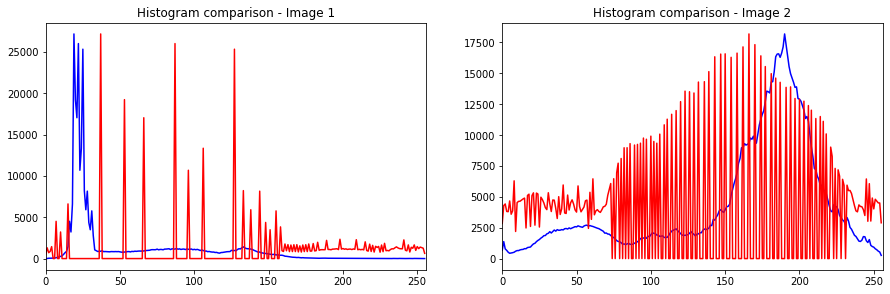

In [20]:
f = plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(hist1, color = "blue", label='Not equalized')
plt.plot(hist_eq1, color = "red", label='Equalized')
plt.xlim([0, 256])
plt.title("Histogram comparison - Image 1")
plt.subplot(2,2,2)
plt.plot(hist2, color = "blue", label='Not equalized')
plt.plot(hist_eq2, color = "red", label='Equalized')
plt.xlim([0, 256])
plt.title("Histogram comparison - Image 2")
plt.show()

As we can see, the equalization of the histogram try to reduce the peaks present in the image, and redestibute them. But, this change dramaticly the image. For the image 1 the back blackgrouns was completly changed. This technique is very useful for many task, as the treatment of satelites images.